In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# metadata.csv dosyasını oku
df = pd.read_csv("/kaggle/input/CORD-19-research-challenge/metadata.csv", low_memory=False)

# Sadece ilk birkaç satırı görelim
df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [3]:
df.isnull().sum()

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time         537789
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
year                 537789
dtype: int64

In [4]:
# Sadece analizde kullanacağımız önemli sütunlar
df_clean = df[["title", "abstract", "publish_time", "journal", "authors"]].copy()

# Bu sütunların hepsinde eksik olan satırları çıkaralım
df_clean = df_clean.dropna(subset=["title", "abstract", "publish_time"])

# Yayın tarihi tekrar datetime’a çevrilip yıl alınır
df_clean["publish_time"] = pd.to_datetime(df_clean["publish_time"], errors="coerce")
df_clean["year"] = df_clean["publish_time"].dt.year


In [5]:
print(f"Temizlenmiş veri kümesinde kalan kayıt sayısı: {len(df_clean)}")


Temizlenmiş veri kümesinde kalan kayıt sayısı: 415488


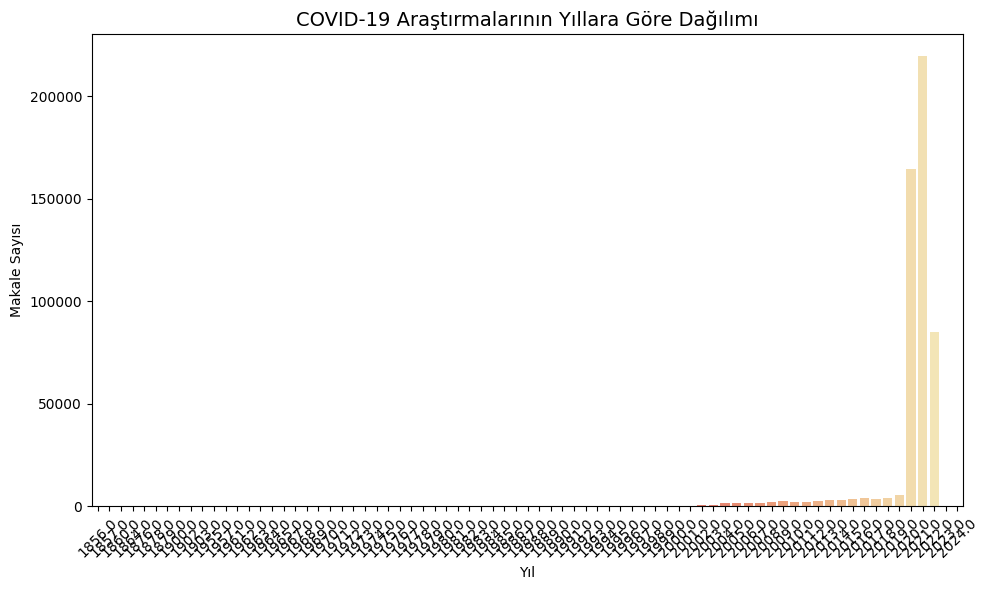

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yayın tarihi sütununu datetime'a çevir (zaten yapıldıysa tekrar yapma)
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
df["year"] = df["publish_time"].dt.year

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="year", palette="magma", order=sorted(df["year"].dropna().unique()))
plt.title("COVID-19 Araştırmalarının Yıllara Göre Dağılımı", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


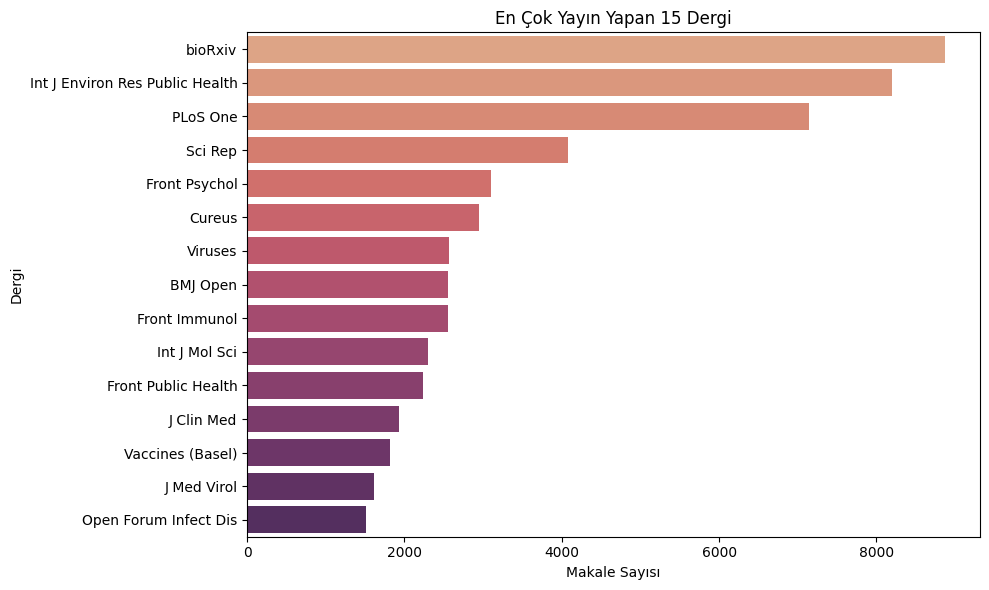

In [7]:
top_journals = df_clean["journal"].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_journals.index, x=top_journals.values, palette="flare")
plt.title("En Çok Yayın Yapan 15 Dergi")
plt.xlabel("Makale Sayısı")
plt.ylabel("Dergi")
plt.tight_layout()
plt.show()


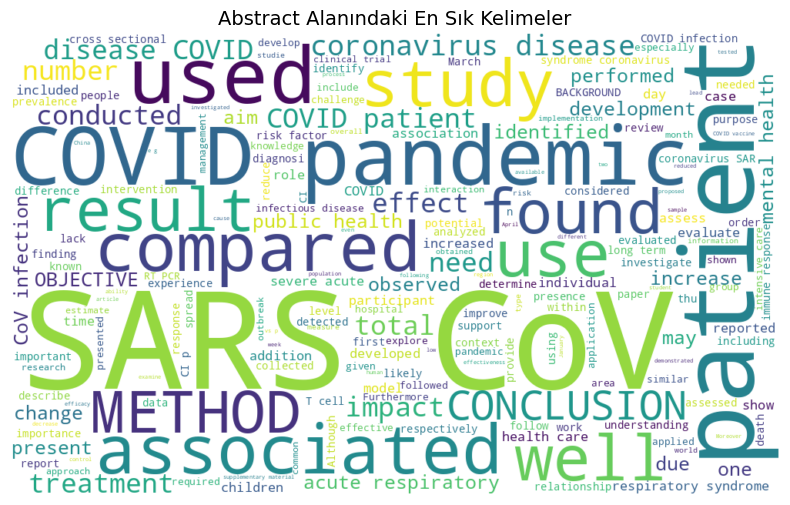

In [8]:
from wordcloud import WordCloud

text = " ".join(str(abs) for abs in df_clean["abstract"] if isinstance(abs, str))

wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words=200).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Abstract Alanındaki En Sık Kelimeler", fontsize=14)
plt.show()


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np


In [10]:
# Sadece ilk 10.000 abstract'ı alıyoruz (RAM dostu olsun diye)
abstracts = df_clean["abstract"].dropna().astype(str).head(10000)


In [11]:
# TF-IDF vektörleştirici
vectorizer = TfidfVectorizer(stop_words='english', max_features=30)  # max 30 kelimeyle sınırladık

# TF-IDF matrisini hesapla
X = vectorizer.fit_transform(abstracts)

# Terimlerin adlarını al
terms = vectorizer.get_feature_names_out()

# Ortalama skorları hesapla
mean_scores = np.asarray(X.mean(axis=0)).ravel()

# Sonuçları DataFrame'e alalım
tfidf_df = pd.DataFrame({'Kelime': terms, 'TF-IDF Skoru': mean_scores})
tfidf_df = tfidf_df.sort_values(by='TF-IDF Skoru', ascending=False)


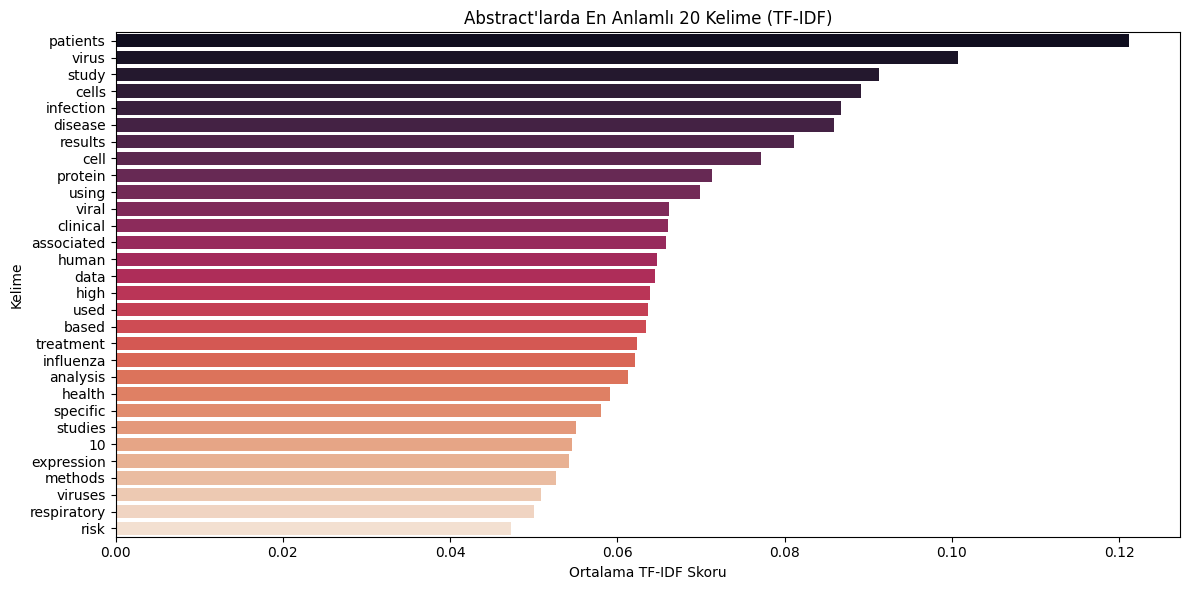

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=tfidf_df.head(30), x='TF-IDF Skoru', y='Kelime', palette="rocket")
plt.title("Abstract'larda En Anlamlı 20 Kelime (TF-IDF)")
plt.xlabel("Ortalama TF-IDF Skoru")
plt.ylabel("Kelime")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# İlk 5000 tanesi ile çalışalım (RAM dostu)
abstracts_sample = df_clean["abstract"].dropna().astype(str).head(5000)


In [15]:
# Sayma tabanlı vektörleştirme (TF değil sadece kelime sıklığı)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X = count_vectorizer.fit_transform(abstracts_sample)


In [16]:
# 5 konulu LDA modeli
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

In [17]:
# Her konu için en anlamlı 10 kelimeyi yazdıralım
terms = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nKonu {topic_idx + 1}:")
    print(", ".join([terms[i] for i in topic.argsort()[:-11:-1]]))



Konu 1:
health, disease, influenza, data, public, transmission, model, based, pandemic, research

Konu 2:
virus, samples, viruses, study, infection, pcr, results, analysis, detected, using

Konu 3:
cells, cell, infection, expression, induced, immune, virus, mice, protein, viral

Konu 4:
patients, respiratory, study, associated, influenza, mortality, clinical, results, 95, infection

Konu 5:
virus, protein, viral, vaccine, rna, viruses, proteins, binding, human, host


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# LDA bileşenleri (konular)
topic_keywords = []
terms = count_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [terms[i] for i in topic.argsort()[:-11:-1]]
    topic_keywords.append(keywords)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/di

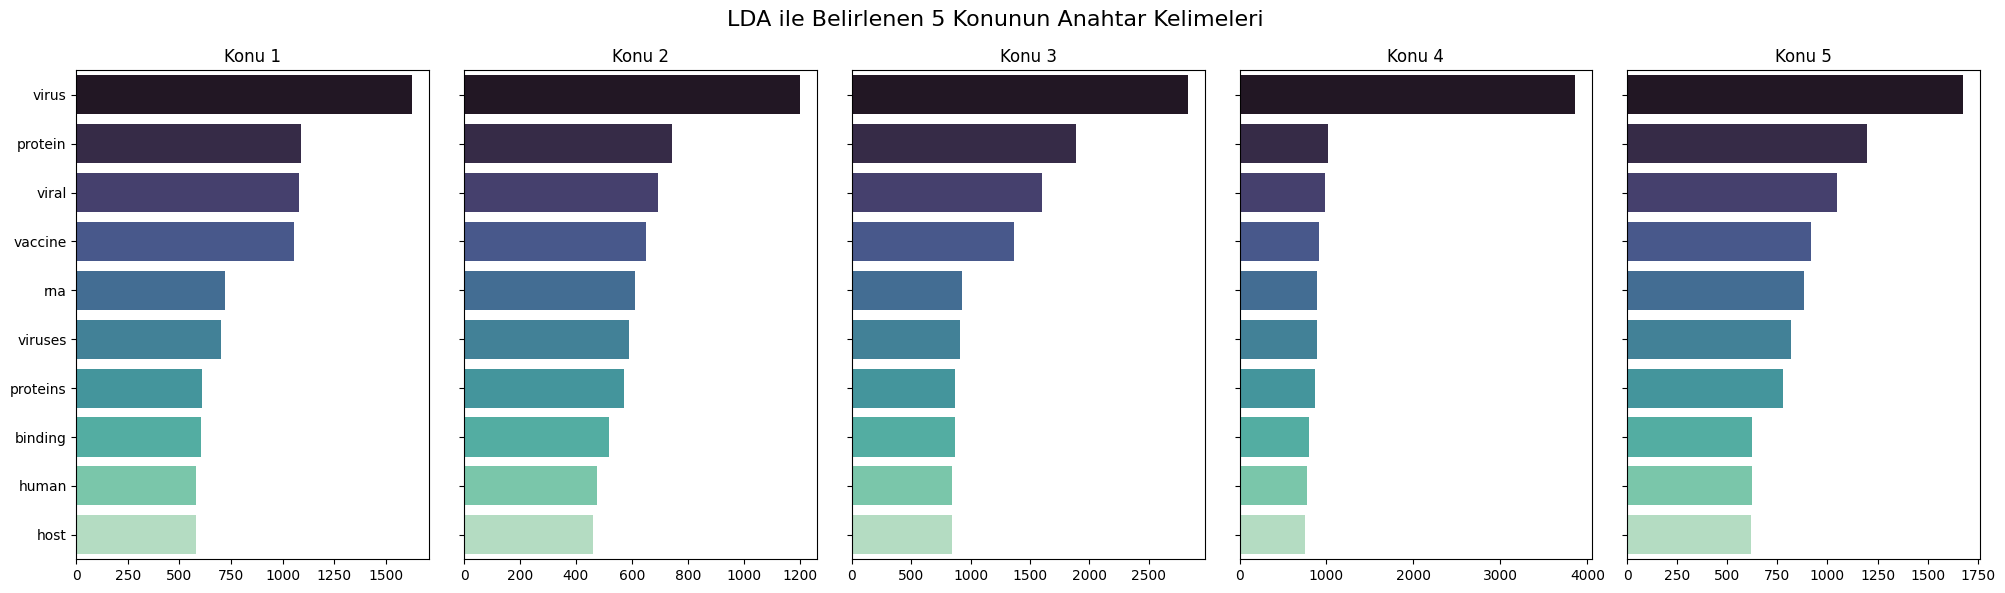

In [19]:
# Her konu için kelime-skor çifti oluşturalım
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

for idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [terms[i] for i in top_words_idx]
    weights = topic[top_words_idx]

    sns.barplot(x=weights, y=top_words, ax=axes[idx], palette='mako')
    axes[idx].set_title(f"Konu {idx+1}")

fig.suptitle("LDA ile Belirlenen 5 Konunun Anahtar Kelimeleri", fontsize=16)
plt.tight_layout()
plt.show()
